# Problem_3_3

Text(0.5, 1.0, 'LMS output')

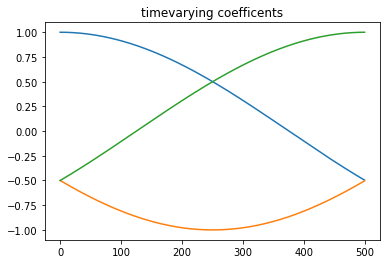

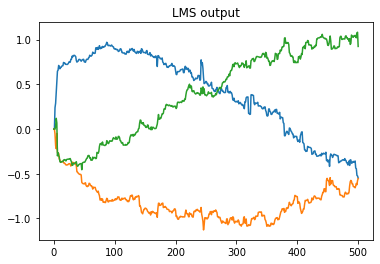

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 11 21:24:53 2020

@author: zheng
"""

import h5py
import numpy as np
import matplotlib.pyplot as plt

def LMS(v, z, eta):
    w = np.zeros([np.shape(v)[0], 3])
    err = np.zeros(np.shape(v)[0])
    y = np.zeros(np.shape(v)[0])
    for i in range(1, np.shape(v)[0]):
        y[i - 1] = np.sum(w[i - 1, :] * v[i - 1, :])
        err[i - 1] = z[i - 1] - y[i - 1]
        w[i] = w[i - 1] + eta * err[i - 1] * v[i - 1]
    
    return w, np.square(err)

model = h5py.File('D:\EE599\HW2\lms_fun_v3.hdf5','r')

timevarying_v = model['timevarying_v'][:]
timevarying_z = model['timevarying_z'][:]
timevarying_coefficents = model['timevarying_coefficents'][:]

plt.figure()
plt.plot(timevarying_coefficents[:, 0])
plt.plot(timevarying_coefficents[:, 1])
plt.plot(timevarying_coefficents[:, 2])
plt.title('timevarying coefficents')

eta = 0.07
w_tv, err_tv = LMS(timevarying_v, timevarying_z, eta)
plt.figure()
plt.plot(w_tv[:,0])
plt.plot(w_tv[:,1])
plt.plot(w_tv[:,2])
plt.title('LMS output')
